In [2]:
import numpy as np
from myprocessor import myprocessor
numtpcs = 2
numplanes = 3
numchannels = 1024
maxwires = 240
minwvfm = 2128
ASDlength = 1065 #the length of the ASD of the minwvfm
SampleSpacing = 0.5e-6
myarray = np.load('/dune/app/users/poshung/multirun/MultiRunData.npz')
#arr_0 = asds #arr_1 = psds #arr_2 = total events #arr_3 = noskips
print("Total Events: "+ str(myarray['arr_2']))
print("Total Channels Analyzed: " + str(np.sum(myarray['arr_3'])))
PSDs = myarray['arr_1']

Total Events: 802
Total Channels Analyzed: 821248


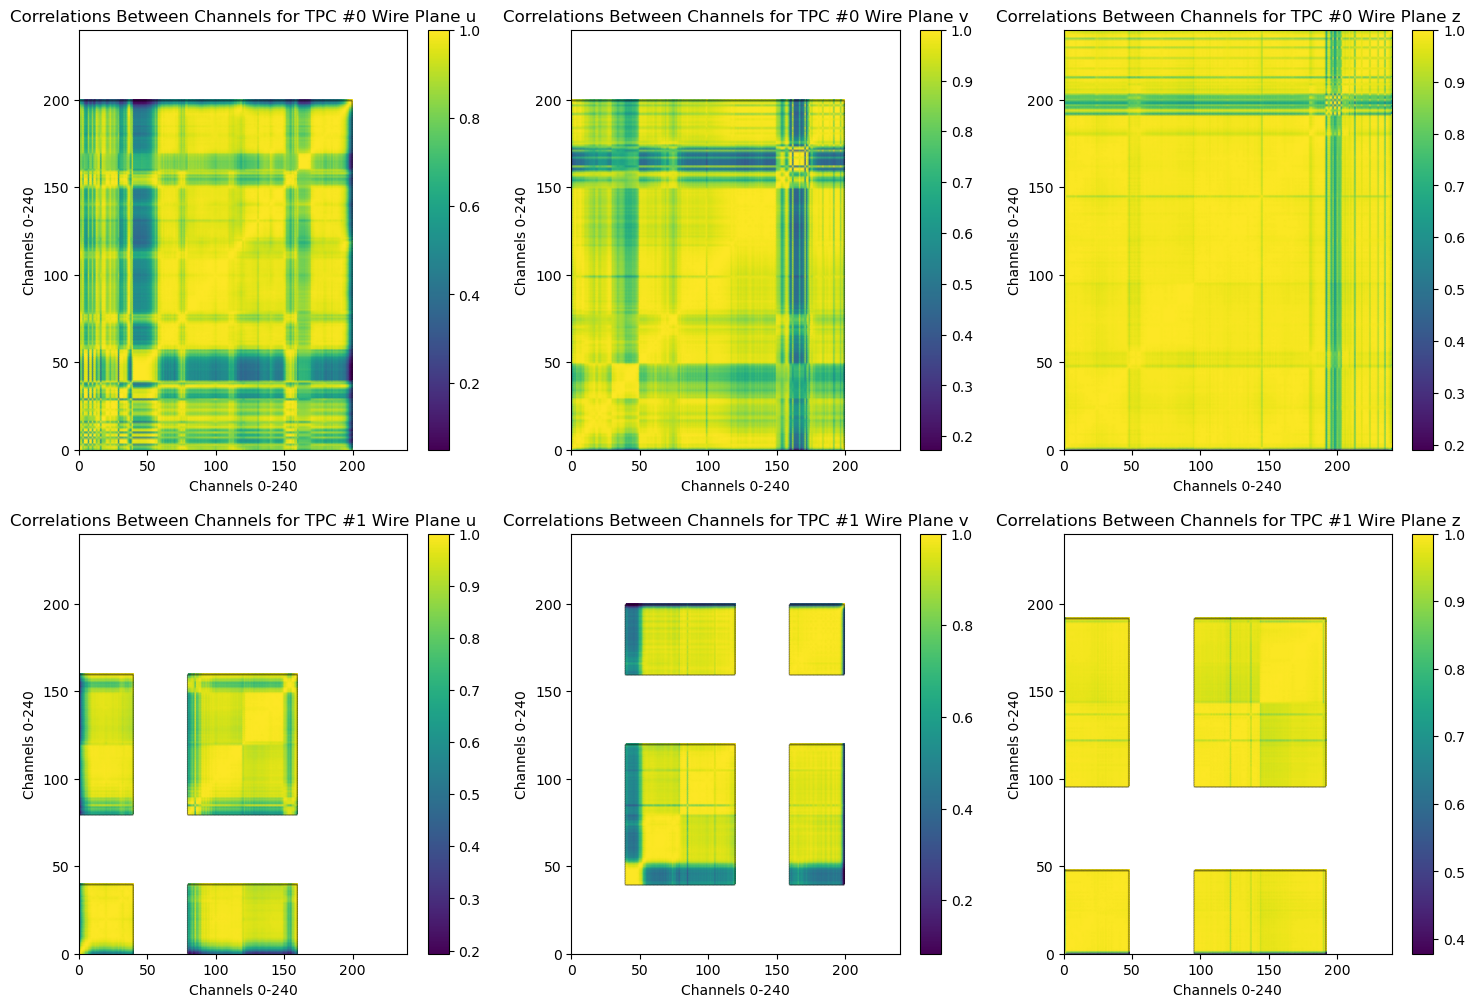

In [16]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(numtpcs,numplanes,num=1)
fig.set_figheight(10*numplanes)
fig.set_figwidth(10*numtpcs)
fig.set_size_inches(18, 12)
planenames = ["u", "v", "z"]

for TPCnum in range(numtpcs):
    for PlaneNum in range(numplanes):
        CurrentPlane = PSDs[TPCnum][PlaneNum]
        rCoeff = np.corrcoef(CurrentPlane)
        ax[TPCnum][PlaneNum].set_xlabel("Channels 0-240")
        ax[TPCnum][PlaneNum].set_ylabel("Channels 0-240")
        ax[TPCnum][PlaneNum].set_title("Correlations Between Channels for TPC #" + str(TPCnum) +" Wire Plane " + planenames[PlaneNum])
        fig.colorbar(ax[TPCnum][PlaneNum].pcolor(rCoeff))
        ax[TPCnum][PlaneNum].pcolormesh(np.arange(240),np.arange(240),rCoeff,shading='gouraud')